# Daily increase of confirmed Covid-19 cases in Switzerland
Visualisations of new confirmed cases per day.<br>
datasource: https://github.com/openZH/covid_19

In [34]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
# the following lines are for future versions of python
#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()

In [35]:
## Population Data

In [36]:
# Population Data on 2019-09-30 
# source: https://www.bfs.admin.ch/bfsstatic/dam/assets/11027463/master
pop = pd.DataFrame([["VD",801557],["VS",344059],["GE",502999],["BE",1038992],["FR",320753],
                    ["SO",274725],["NE",176814],["JU",73620],["BS",195962],["BL",288867],
                    ["AG",683780],["ZH",1534233],["GL",40489],["SH",82262],["AR",55315],
                    ["AI",16091],["SG",510412],["GR",198410],["TG",278831],["LU",412437],
                    ["UR",36638],["SZ",159788],["OW",37892],["NW",43048],["ZG",126822],
                    ["TI",351754]],columns=['canton','inhabitants'])


pop['rank'] = pop['inhabitants'].rank(ascending = False)
pop.sort_values(by = ['rank'], inplace = True)
pop_CH = pop['inhabitants'].sum()
pop['percent'] = pop['inhabitants']/pop_CH*100
pop.set_index('rank',inplace = True)
pop.head()

,canton,inhabitants,percent
rank,,,
1.0,ZH,1534233,17.867863
2.0,BE,1038992,12.100227
3.0,VD,801557,9.335030
4.0,AG,683780,7.963385
5.0,SG,510412,5.944320


## Read Data

In [37]:
url_head = 'https://raw.githubusercontent.com/openZH/covid_19/master/fallzahlen_kanton_total_csv/COVID19_Fallzahlen_Kanton_'
url_tail = '_total.csv'

# create empty list for DataFrames
dataframes=[]

for c in pop['canton']:
    url = url_head + c + url_tail
    df_canton = pd.read_csv(url)
    dataframes.append(df_canton)
    
df_CH = pd.concat(dataframes, sort=False) 
df_CH['date'] = pd.to_datetime(df_CH['date'], dayfirst=True)
df_CH.rename(columns={'abbreviation_canton_and_fl': 'canton'},inplace=True)

time_read = datetime.datetime.now().strftime("%Y-%m-%d, %H:%M")

df_CH.head()


,date,time,canton,ncumul_tested,ncumul_conf,ncumul_hosp,ncumul_ICU,ncumul_vent,ncumul_released,ncumul_deceased,source,TotalPosTests1,TotalCured,ncumul_ICF,ncumul_ICU_intub,ncumul_deceased_suspect
0,2020-02-27,NaN,ZH,NaN,1.0,NaN,NaN,NaN,NaN,NaN,https://gd.zh.ch/internet/gesundheitsdirektion...,2.0,NaN,NaN,NaN,NaN
1,2020-02-28,NaN,ZH,NaN,2.0,NaN,NaN,NaN,NaN,NaN,https://gd.zh.ch/internet/gesundheitsdirektion...,9.0,NaN,NaN,NaN,NaN
2,2020-03-02,NaN,ZH,NaN,2.0,NaN,NaN,NaN,NaN,NaN,https://gd.zh.ch/internet/gesundheitsdirektion...,13.0,NaN,NaN,NaN,NaN
3,2020-03-03,NaN,ZH,400.0,9.0,NaN,NaN,NaN,NaN,NaN,https://gd.zh.ch/internet/gesundheitsdirektion...,19.0,NaN,NaN,NaN,NaN
4,2020-03-05,NaN,ZH,NaN,19.0,NaN,NaN,NaN,NaN,NaN,https://gd.zh.ch/internet/gesundheitsdirektion...,26.0,NaN,NaN,NaN,NaN


## Create DataFrame with cumulated confirmed cases
One row per day and one column per canton 

In [38]:
df_confirmed = df_CH.pivot(index='date', columns='canton',values='ncumul_conf')
df_confirmed.tail()

canton,AG,AI,AR,BE,BL,BS,FR,GE,GL,GR,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
date,,,,,,,,,,,,,,,,,,,,,
2020-03-23,241.0,NaN,30.0,470.0,302.0,376.0,226.0,1509.0,NaN,NaN,...,30.0,95.0,NaN,81.0,1165.0,22.0,1822.0,527.0,62.0,1068.0
2020-03-24,266.0,8.0,33.0,532.0,306.0,414.0,255.0,1598.0,33.0,276.0,...,32.0,104.0,NaN,87.0,1211.0,25.0,2162.0,606.0,72.0,1211.0
2020-03-25,319.0,9.0,34.0,624.0,341.0,466.0,293.0,1708.0,40.0,322.0,...,34.0,129.0,99.0,96.0,1354.0,NaN,2215.0,651.0,80.0,1363.0
2020-03-26,349.0,11.0,42.0,660.0,422.0,505.0,309.0,1743.0,43.0,373.0,...,35.0,141.0,99.0,110.0,1401.0,38.0,NaN,715.0,87.0,1476.0
2020-03-27,NaN,NaN,43.0,718.0,NaN,NaN,NaN,NaN,NaN,409.0,...,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,1578.0


## Fill missing values with previous values

In [39]:
df_confirmed.fillna(method='pad', inplace=True)

# Switzerland total = sum over all cantons
df_confirmed["CH_cumul_conf"] = df_confirmed.loc[:,'AG':'ZH'].sum(axis = 1)
df_confirmed.tail()

canton,AG,AI,AR,BE,BL,BS,FR,GE,GL,GR,...,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH,CH_cumul_conf
date,,,,,,,,,,,,,,,,,,,,,
2020-03-23,241.0,6.0,30.0,470.0,302.0,376.0,226.0,1509.0,31.0,266.0,...,95.0,13.0,81.0,1165.0,22.0,1822.0,527.0,62.0,1068.0,9051.0
2020-03-24,266.0,8.0,33.0,532.0,306.0,414.0,255.0,1598.0,33.0,276.0,...,104.0,13.0,87.0,1211.0,25.0,2162.0,606.0,72.0,1211.0,10040.0
2020-03-25,319.0,9.0,34.0,624.0,341.0,466.0,293.0,1708.0,40.0,322.0,...,129.0,99.0,96.0,1354.0,25.0,2215.0,651.0,80.0,1363.0,11063.0
2020-03-26,349.0,11.0,42.0,660.0,422.0,505.0,309.0,1743.0,43.0,373.0,...,141.0,99.0,110.0,1401.0,38.0,2215.0,715.0,87.0,1476.0,11781.0
2020-03-27,349.0,11.0,43.0,718.0,422.0,505.0,309.0,1743.0,43.0,409.0,...,141.0,99.0,110.0,1401.0,38.0,2215.0,715.0,94.0,1578.0,12020.0


## New confirmed cases per day
New confirmed cases per day is an important information. It's calculated as numeric, first time derivative of cumlated cases.

In [40]:
# calculate New confirmed cases per day from cumulated cases
df_confirmed["CH_increase_conf"] = df_confirmed["CH_cumul_conf"] - df_confirmed["CH_cumul_conf"].shift(1)

## Less cases confirmed on weekends
On weekends (grey), there are less cases confirmed than on workdays (blue). A considerable number of cases from weekends seem to be added on Mondays. This might be interpreted as huge increase.

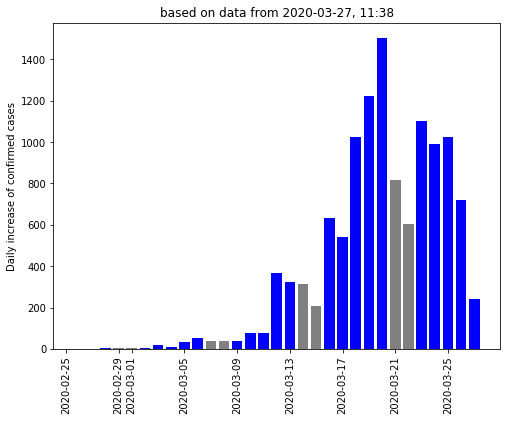

In [41]:
# set color = blue for workdays. Grey on weekends.
df_confirmed["color"] = np.where(df_confirmed.index.dayofweek < 5,'blue','grey')

# plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation='vertical')
plt.title("based on data from " + time_read)
ax.set_ylabel("Daily increase of confirmed cases")
plt.bar(df_confirmed.index,df_confirmed['CH_increase_conf'],color=df_confirmed['color'])
plt.show()

## Moving averages
Because of the influence of weekends and other fluctuations, new confirmed cases per day are difficult to interpret in the plot above.<br>
Moving averages may be more reliable.

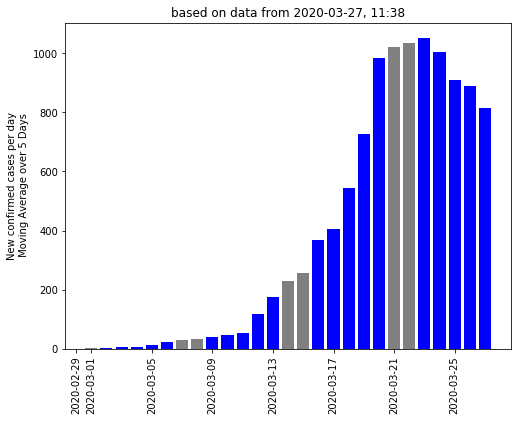

In [42]:
w = 5 # width of moving average
df_confirmed['mave'] = df_confirmed['CH_increase_conf'].rolling(window=w,center=False).mean()
fig, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation='vertical')
plt.title("based on data from "+time_read)
ax.set_ylabel("New confirmed cases per day\n Moving Average over " + str(w) + " Days")
plt.bar(df_confirmed.index,df_confirmed['mave'],color=df_confirmed['color'])
plt.show()